# Case 2

When executing MaskRCNN, we see the latencies to be very spiky. We try to investigate the cause of these spikes by running a profiler.

While inspecting the profiler, we see a strong correlation between the spikes and the calls to the following functions:

void cudnn::detail::dgrad2d_alg1_1  
cgemm_strided_batched_sm35_ldg_nt  
cudnn_convolve_sgemm_sm35_ldg_nn  
void cudnn::detail::dgrad_alg1_engine  
void fft1d_r2c_32  
void fft1d_c2r_32  

Timings: [15, 17, 23, 30, 50, 64, 78, 85, 124]

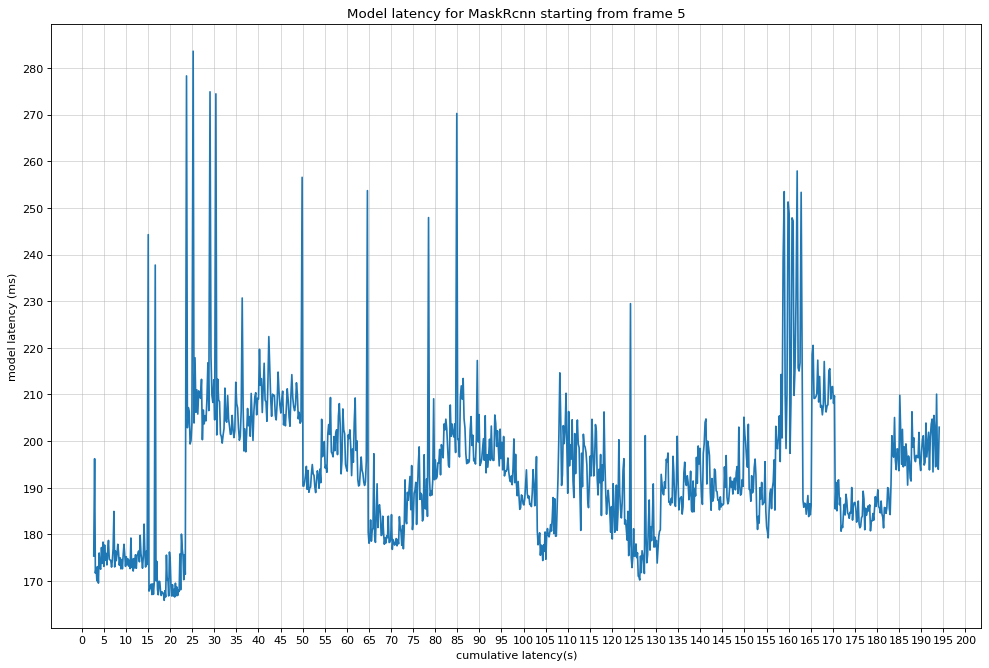

In [118]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

missing_data = [1628.854,298.6503,184.5461,250.4335,170.1856]
data = [175.3767,196.2329,171.7166,172.9532,170.0675,173.1256,169.5761,176.0347,172.8493,172.5567,177.2063,173.808,178.3723,173.1528,177.7517,174.491,175.9543,173.4729,176.4886,178.7255,174.686,174.5436,174.4498,173.0041,174.4107,176.9381,184.9312,173.0377,176.4664,174.375,175.762,177.9018,176.0849,173.4165,174.9962,172.6337,174.6474,172.6439,175.6895,177.8995,175.7003,173.1616,175.2146,173.5385,174.7965,173.2166,174.4456,172.6879,179.243,172.9254,174.6889,172.1608,174.8492,172.8449,175.6579,172.7563,175.4423,175.8495,176.4478,174.1407,179.8021,175.8624,174.7321,172.7734,175.0444,182.2255,176.2317,173.0232,176.4438,173.5426,244.2525,167.8611,168.3281,169.0219,169.3741,167.1231,169.4044,167.1683,169.509,237.7375,170.0629,174.2338,168.2117,167.0852,169.9653,169.91,167.9449,166.9248,167.7208,167.4945,167.3638,165.8882,167.9523,166.6078,175.5861,170.1743,170.5297,166.8243,176.2312,174.3683,168.818,166.8081,169.2322,166.8357,168.2452,166.5947,169.5632,166.8822,168.748,166.9123,168.0486,167.7715,175.82,168.1434,180.0764,176.9143,175.5047,170.3071,175.6563,171.4763,278.2719,202.8748,207.1926,206.3408,199.3883,200.1482,203.8122,283.5622,203.895,217.8649,206.1942,210.9976,205.8001,210.7818,210.1711,209.1644,213.2499,200.3017,206.6804,203.6994,205.4619,204.3464,209.0872,216.7805,206.5575,274.8594,218.1596,209.8392,208.292,213.1592,204.5692,274.4244,201.3345,213.2802,208.8137,208.4724,201.5108,201.0228,199.5745,201.303,202.6744,211.3708,204.3886,204.0639,209.7675,204.7835,203.2667,201.4633,201.5299,205.5165,202.5686,200.7553,202.2878,212.6275,208.0313,207.1185,202.7444,200.1918,200.9999,206.5023,230.6714,207.3702,197.8841,202.6276,197.708,201.714,206.9966,203.2915,205.2642,201.0427,210.2225,205.3732,200.1473,206.3981,209.5335,210.3837,205.6359,209.1784,209.0464,219.6895,211.9676,213.404,206.1336,211.561,216.696,208.8051,208.4163,204.2576,211.7947,222.409,215.7534,209.1482,205.3265,210.0689,209.7886,209.8017,205.5055,204.5505,208.0719,214.8038,210.6083,207.6492,206.0302,209.0025,210.713,203.4844,205.6226,203.2854,206.9605,211.2144,208.8425,205.1217,203.1943,209.6452,214.2572,209.3518,207.37,206.5292,207.7592,212.5112,210.1169,204.7903,206.1811,203.8449,204.2157,256.5368,190.3785,190.3702,191.239,192.6911,194.5977,189.6747,193.7259,189.0468,189.9717,190.1553,193.0671,194.9892,192.9817,192.678,190.1648,188.9741,191.504,193.6435,192.6665,189.8972,194.0126,191.0982,204.6796,196.6661,197.9599,199.9276,194.2438,194.7769,193.3248,201.3601,203.5631,201.4447,209.346,197.6839,197.3215,196.6417,200.9828,197.948,201.7299,202.4351,197.1183,205.3626,208.0486,203.3573,192.9914,195.8226,206.9048,202.4433,201.6103,195.0068,194.2132,193.567,201.3162,200.5682,202.4208,198.6732,192.617,198.319,195.4783,204.1351,209.2585,198.0121,200.0691,191.8188,190.3908,190.6019,193.7576,196.5995,193.7812,193.0608,191.2576,190.5053,191.2788,195.6985,253.683,180.4707,178.1195,178.7559,183.1106,178.5742,180.8554,181.3828,197.296,179.4977,178.307,184.3039,190.8655,181.4775,186.0282,186.3698,184.378,179.7853,179.8948,183.9211,180.4819,177.9034,179.2617,178.174,179.7161,179.3173,183.9285,178.2757,178.3733,179.036,184.2562,176.7967,178.9053,178.3163,177.7255,178.1143,179.1157,177.5656,178.9379,177.9958,183.8241,181.3907,180.5522,177.6802,181.9148,176.9291,180.7175,191.695,183.2255,182.3111,189.0322,187.3261,190.0311,192.4324,185.3063,194.7613,181.0489,183.2739,188.798,189.4142,191.1708,182.1487,188.9105,194.8786,198.7738,187.5132,188.8302,188.5128,182.8891,183.5317,197.0755,185.5968,185.4701,191.9156,183.8838,247.9088,192.6969,188.2954,189.3942,188.4314,191.5993,209.0715,191.7378,195.9618,191.9387,192.3521,195.359,195.31,198.2324,192.7805,199.2507,197.995,196.4178,203.6855,202.4061,204.7157,202.7261,198.9328,194.7828,194.4149,207.7475,201.0333,203.6804,201.5839,200.8946,203.6958,197.5719,270.2164,200.3497,200.4572,196.609,209.52,211.8563,209.0058,213.4313,204.7781,202.8244,197.303,195.173,196.0236,195.3623,195.7498,202.3627,205.2646,199.0843,201.2703,195.7612,196.2499,195.0964,200.6149,217.2736,199.8195,205.6962,194.8001,195.2765,196.138,198.2588,200.5283,195.8974,205.4513,193.2058,197.1002,194.4369,196.9899,200.4222,195.8747,203.2402,196.3784,195.8724,195.8997,205.6118,203.7914,198.8694,202.2089,198.2846,194.6943,202.5691,196.2651,199.7417,193.8483,200.9993,192.5438,193.6605,193.4982,194.0002,196.3889,193.4191,191.9134,191.2965,192.5435,190.6659,194.1515,200.4774,191.1001,197.1739,190.6349,188.3032,191.362,188.3581,185.387,185.7096,188.475,188.2089,186.5631,186.3249,187.6717,190.8627,193.8515,188.7507,187.8081,188.2309,186.4205,186.4738,185.9855,188.9088,193.8942,190.9855,186.1545,190.4394,196.6844,180.9407,177.7892,178.4233,180.3484,175.5327,177.722,177.4069,174.4125,177.7645,176.3839,180.5401,174.6948,179.9631,181.2642,179.7845,179.4873,180.5441,182.1327,180.7215,183.7034,187.9134,180.1912,187.6635,179.6289,179.6711,186.1788,192.074,201.2793,214.6298,204.6507,190.5111,192.7602,203.3345,199.4689,202.3745,210.2553,198.244,188.8471,206.3473,194.6995,199.2291,196.1615,204.578,191.4919,187.9128,201.6147,193.0326,200.1036,204.536,199.3655,198.6118,188.8183,180.8747,197.4129,190.2397,201.481,199.1517,198.7125,197.5696,194.871,187.4474,185.7486,190.8991,196.81,192.5442,204.6909,198.0832,192.5448,195.3084,203.5545,202.1352,191.9681,188.466,193.965,191.1007,197.1355,184.0763,194.8906,191.5292,206.257,195.2237,188.9497,184.3317,187.3568,189.4848,187.0861,184.5293,180.4792,185.9711,179.0306,190.8823,186.7621,180.4628,181.7575,190.5698,180.8805,184.7113,200.2906,188.9059,185.4675,183.5443,186.8437,193.7431,196.2505,182.2241,183.0763,181.1621,178.7951,184.9573,175.4699,177.8411,229.4666,174.9883,172.9092,175.0747,181.2428,175.3459,175.3872,177.9756,175.0402,176.0724,171.086,170.9014,170.2433,175.3751,171.8279,176.5171,175.4589,174.3835,171.6423,201.1842,179.5986,173.9307,175.6599,182.3451,187.3941,176.6471,181.6732,178.6806,183.2759,190.8323,177.2904,179.4668,177.3893,178.7229,173.8668,176.5415,179.5844,180.6752,180.979,192.8856,190.8514,188.7844,188.5007,191.3027,189.9082,196.0976,195.6017,197.4597,186.9292,187.0485,186.2827,187.7363,186.7926,196.7566,193.2755,186.709,186.0213,190.8225,201.0358,191.6727,185.2597,187.5933,187.8341,188.106,184.3659,185.8747,193.1814,195.4948,191.2588,190.4917,192.5747,191.1925,187.4437,188.9322,193.555,185.212,184.8223,191.4667,184.8557,189.8871,188.2706,196.531,190.9559,198.972,195.1177,198.4627,192.1007,188.0893,186.4518,197.3724,199.4018,204.0319,204.7617,190.8232,200.006,198.6601,196.9157,189.1044,185.1972,191.9984,187.1481,187.9564,194.0211,193.5789,189.3326,189.1903,187.3683,187.364,185.2767,188.0595,185.9013,186.4933,186.3117,186.5587,194.4837,190.0932,196.9187,187.9751,186.5655,187.0801,189.6757,192.2745,190.1518,191.4083,188.6629,191.1379,192.0685,189.5616,193.2671,194.5478,188.7743,203.0026,190.4959,188.4285,188.746,191.7472,190.302,205.14,201.4659,199.4867,196.2829,194.4172,203.6106,189.6762,189.4851,187.1234,192.5967,188.9131,189.7717,194.3123,196.1604,192.751,184.0742,181.074,183.8965,182.435,190.0257,187.6339,191.1583,186.388,186.7229,186.8331,195.5981,185.0159,181.627,180.6365,179.2773,184.7342,188.8436,189.7314,185.5403,189.9493,191.2437,195.9869,185.2312,203.1808,199.0445,198.3534,201.0309,205.4195,195.6341,214.2869,200.6913,238.7342,253.4746,210.2217,198.4243,209.862,251.2635,248.7187,197.3987,208.258,247.8549,247.1938,209.8169,215.5937,230.3636,257.8958,215.7059,215.032,216.7872,253.3139,218.7557,187.4038,185.8379,186.7089,186.5746,184.3408,186.4486,188.349,183.8364,186.5984,184.2148,186.2624,218.6106,220.5285,209.146,209.2052,209.5188,210.2295,217.3627,208.3824,213.8621,207.2666,207.6407,205.6381,207.5932,217.073,208.4809,206.2501,207.5006,207.8139,215.1475,215.5358,209.0429,211.522,211.7015,208.0985,209.7175,185.4724,191.1239,185.0672,191.487,191.7094,186.3773,187.8245,180.6988,181.8859,181.4894,184.8279,186.4664,184.1729,188.6161,187.2192,184.5879,184.3231,183.4668,184.7715,184.5836,190.0632,183.081,186.1248,186.8181,186.8631,185.5917,182.6467,184.0183,187.1647,182.3248,181.4356,181.7466,183.5918,183.889,189.2769,187.6309,181.0088,185.6336,184.1016,184.8843,186.0979,185.0171,186.3451,180.779,182.8721,182.897,184.4903,183.0528,185.4275,188.0974,186.019,187.6084,189.5704,185.9684,185.6398,184.6204,187.1668,184.4102,183.7185,181.4073,185.7799,185.7119,184.5247,185.6543,190.0348,189.8053,185.5508,184.267,190.61,201.165,197.4576,196.5681,205.0662,195.8024,193.89,198.3641,198.1846,193.6611,209.8184,201.9209,195.038,202.5318,194.4968,198.8081,194.7492,199.4129,196.9605,190.5794,196.8189,195.816,192.0974,191.4497,206.2908,198.7208,200.732,196.2577,195.605,196.9554,196.6537,196.4345,201.8706,195.3352,193.7071,197.7034,200.3352,201.1693,194.8774,195.4472,203.8911,196.6123,199.1685,201.899,193.836,200.8595,203.6669,204.7395,193.4102,205.5087,202.2587,194.5026,210.069,195.038,193.9602,202.9896]
cumu = 2532.6695
cumu_data = []
for i in data:
    cumu_data.append((i+cumu)/1000)
    cumu += i

# x = [i for i in range(6, 1000)]
x = cumu_data
figure(figsize=(15, 10), dpi=80)
import numpy as np
minor_ticks = np.arange(0, 203, 5)
major_ticks = np.arange(160, 301, 10)

plt.xticks(minor_ticks)
plt.yticks(major_ticks)
plt.plot(x, data)
plt.title(f"Model latency for MaskRcnn starting from frame 5")
plt.ylabel("model latency (ms)")
plt.xlabel("cumulative latency(s)")
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.5)
plt.savefig(f"latency_maskrcnn_case2.png")
plt.show()


# Load benchmark files

In [119]:
import json

# Load a file and store values
class benchmark_file:

    def __init__(self, filename, path):
        split = filename.replace(".json", "").split("_")
        self.run = int(split[3])
        self.model_name = "yolo" if split[1] == "FrameDnnOnnxYolo" else "fcn"
        self.experiment_name = split[2]
        self.video_name = filename.replace(".json", "")

        data = open(path, "r")
        json_data = json.load(data)
        self.object_detection = json_data['object_detection']

    def calculate_accuracy(self, actuals):
        run = None
        for value in actuals:
            if value.run == self.run:
                run = value
                break

        if run == None:
            raise InterruptedError("Unable to find actuals")

        hits = 0
        misses = 0

        total_objects = 0
        total_objects_det = 0

        for obj in run.object_distribution:
            total_objects += len(list(set(obj)))

        for obj in self.object_detection:
            total_objects_det += len(list(set(obj)))

        self.miss_data = []
        self.hit_data = []
        for v1, v2 in zip(run.object_distribution, self.object_detection):
            miss = []
            hit = []
            for d1 in list(set(v1)):
                if d1 not in v2:
                    miss.append(d1)
                    misses += 1
                else:
                    hit.append(d1)
                    hits += 1

            self.miss_data.append(miss)
            self.hit_data.append(hit)


        self.precision = (0 if total_objects_det == 0 else hits*100/total_objects_det)
        self.recall = hits*100/total_objects

In [120]:
import os
import json

BENCHMARK_FOLDER = "./case3"

def discover_benchmarks():
    benchmark_files = []

    for files in os.listdir(BENCHMARK_FOLDER):
        file_path = os.path.join(BENCHMARK_FOLDER, files)

        if "json" not in files:
            continue

        benchmark_data = benchmark_file(files, file_path)
        benchmark_files.append(benchmark_data)

    return benchmark_files


benchmarks = discover_benchmarks()

# Load actuals files

In [121]:
class actuals_data:

    def __init__(self, filename, file_path):
        split = filename.replace(".json", "").split("_")

        data = open(file_path, "r")
        json_data = json.load(data)

        self.experiment_name = split[0]
        self.run = int(split[1])
        self.fps = 30

        self.object_distribution = []
        self.object_count = []

        for value in json_data['object_distribution']:
            for i in range(self.fps):
                self.object_distribution.append(value)
                self.object_count.append(len(value))

        # print(self.object_count)
        


In [122]:
import os
import json

ACTUALS_FOLDER = "./actuals3"

def discover_actuals():
    actuals_files = []

    for files in os.listdir(ACTUALS_FOLDER):
        file_path = os.path.join(ACTUALS_FOLDER, files)
        if "json" not in files:
            continue

        # print(len(json_data['object_distribution']))

        data = actuals_data(files, file_path)
        actuals_files.append(data)

    return actuals_files


actuals = discover_actuals()

In [123]:
for benchmark in benchmarks:
    benchmark.calculate_accuracy(actuals)

yolo_benchmarks = [None for i in actuals]
fcn_benchmarks = [None for i in actuals]

for obj in benchmarks:
    if obj.model_name == "yolo":
        yolo_benchmarks[obj.run] = obj
    else:
        fcn_benchmarks[obj.run] = obj

yolo_precision = [yolo.precision for yolo in yolo_benchmarks]
yolo_recall = [yolo.recall for yolo in yolo_benchmarks]
fcn_precision = [fcn.precision for fcn in fcn_benchmarks]
fcn_recall = [fcn.recall for fcn in fcn_benchmarks]

data = [yolo_precision, yolo_recall, fcn_precision, fcn_recall]

print(f"Yolo precision: {yolo_precision}")
print(f"Yolo recall: {yolo_recall}")
print(f"FCN precision: {fcn_precision}")
print(f"FCN recall: {fcn_recall}")



Yolo precision: [93.10689310689311, 20.72072072072072, 75.41073384446878, 58.8235294117647, 98.68699703515459, 0.0, 99.06639004149378, 67.76539020843433, 20.72072072072072, 75.41073384446878]
Yolo recall: [34.646840148698885, 0.3607843137254902, 40.982142857142854, 0.057971014492753624, 21.574074074074073, 0.0, 5.270419426048565, 14.338461538461539, 0.3607843137254902, 40.982142857142854]
FCN precision: [88.85383806519454, 4.804469273743017, 46.123128119800334, 0.5767844268204758, 48.662640207075064, 0.0, 53.40122199592668, 49.69408565601631, 4.804469273743017, 46.123128119800334]
FCN recall: [20.94175960346964, 0.33725490196078434, 20.625, 0.0463768115942029, 5.222222222222222, 0.0, 7.235099337748345, 7.4974358974358974, 0.33725490196078434, 20.625]


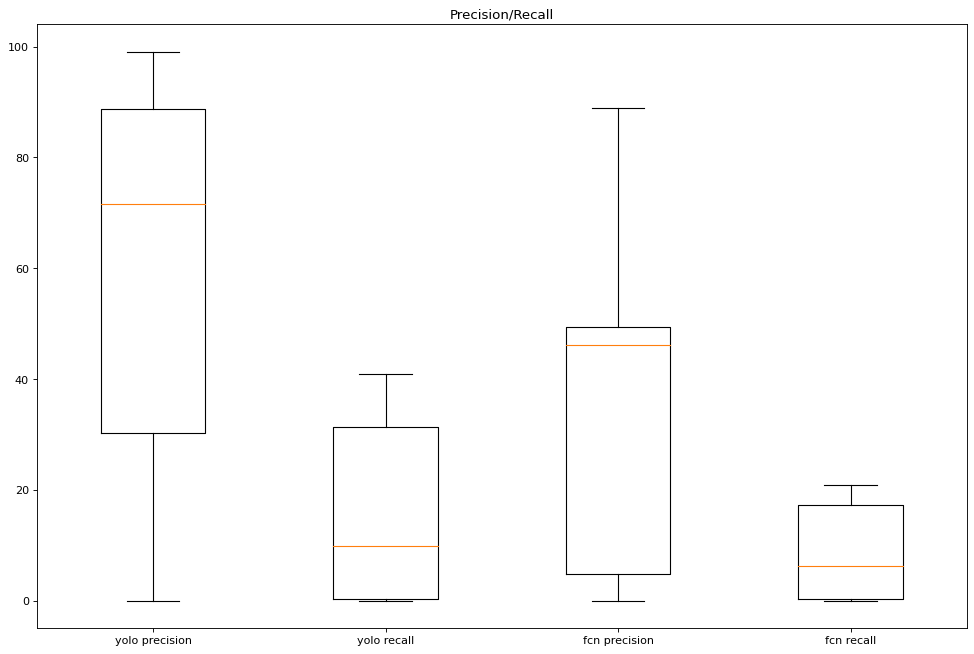

In [125]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(15, 10), dpi=80)
ax1.set_title('Precision/Recall')
ax1.boxplot(data, labels=("yolo precision","yolo recall","fcn precision", "fcn recall"))
plt.savefig("case3.png")
plt.show()